<a href="https://colab.research.google.com/github/shimjaeman/PyTorch-Tutorials/blob/main/04_(Pytorch)_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN 이론 설명


1. CNN 개념과 구조

  - CNN : Convolutional Neural Networks의 약자로 딥러닝에서 주로 이미지나 영상 데이터를 처리할 때 쓰이며 이름에서 알수있다시피 Convolution이라는 전처리 작업이 들어가는 Neural Network 모델이다. 

  - 일반 DNN은 기본적으로 1차원 형태의 데이터를 사용합니다. 때문에 이미지가 입력값이 되는 경우, 이것을 flatten시켜서 한줄 데이터로 만들어야 하는데 이 과정에서 이미지의 공간적/지역적 정보(spatial/topological information)가 손실되게 됩니다. 또한 추상화과정 없이 바로 연산과정으로 넘어가 버리기 때문에 학습시간과 능률의 효율성이 저하됩니다.

 - CNN은 이미지를 날것(raw input) 그대로 받음으로써 공간적/지역적 정보를 유지한 채 특성(feature)들의 계층을 빌드업합니다. 

 - CNN의 중요 포인트는 이미지 전체보다는 부분을 보는 것, 그리고 이미지의 한 픽셀과 주변 픽셀들의 연관성을 살리는 것입니다.

2. Convolution

  - 하나의 합성곱 계층에는 입력되는 이미지의 채널 개수만큼 필터가 존재

  - 각 채널에 할당된 필터를 적용함으로써 합성곱 계층의 출력 이미지가 생성

  - 특정 패턴이 있는지 박스로 훓으며 마킹

  - 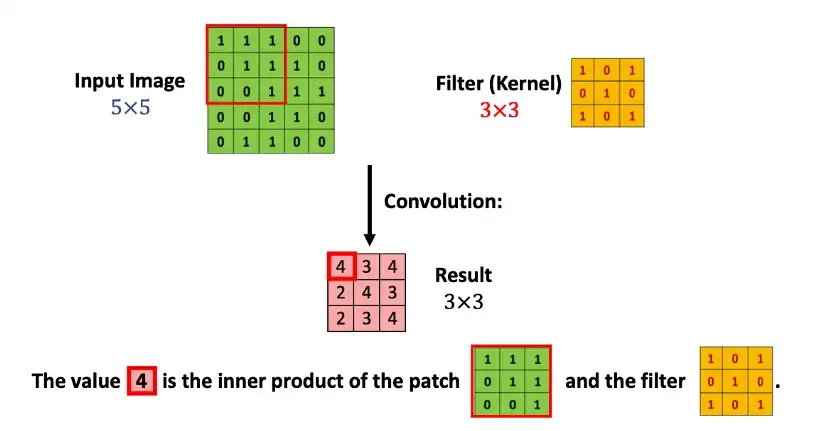


2.1. Stride
  
   - 이미지에 대해 필터를 적용할 때의 필터의 이동량을 의미

   - 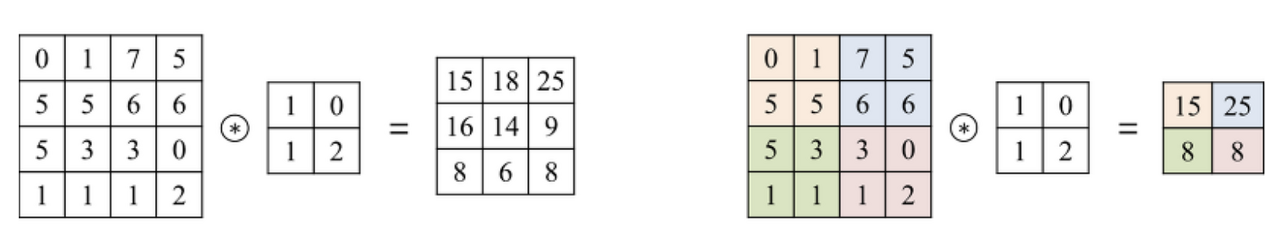
  - (왼쪽) stride = 1인 경우, (오른쪽) stride = 2인 경우

2.2. Zero Padding
  
  - Convolution 결과값의 크기가 손실되는 부분이 발생하여 0로 구성된 테두리를 이미지 가장자리에 감싸 손실 방지

  - 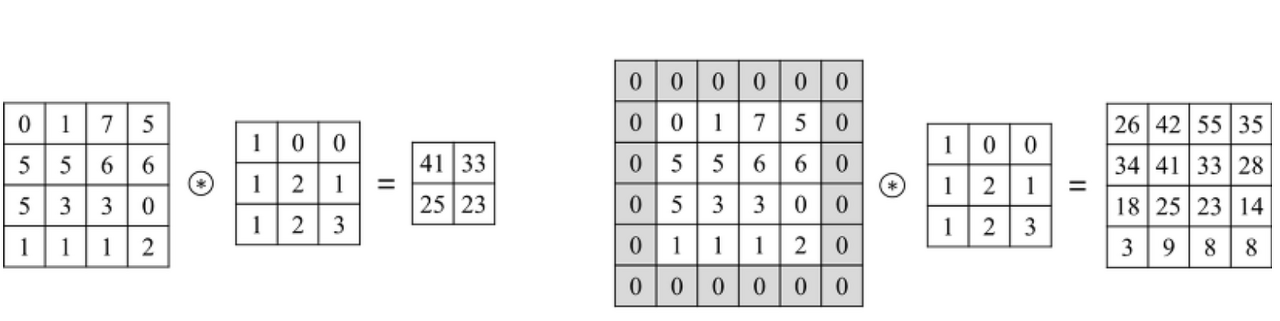

3. Pooling Layer

  -  Pooling은 각 결과값(feature map)의 dimentionality를 축소해 주는 것을 목적

  - correlation이 낮은 부분을 삭제하여 각 결과값을 크기(dimension)을 줄이는 과정

  - 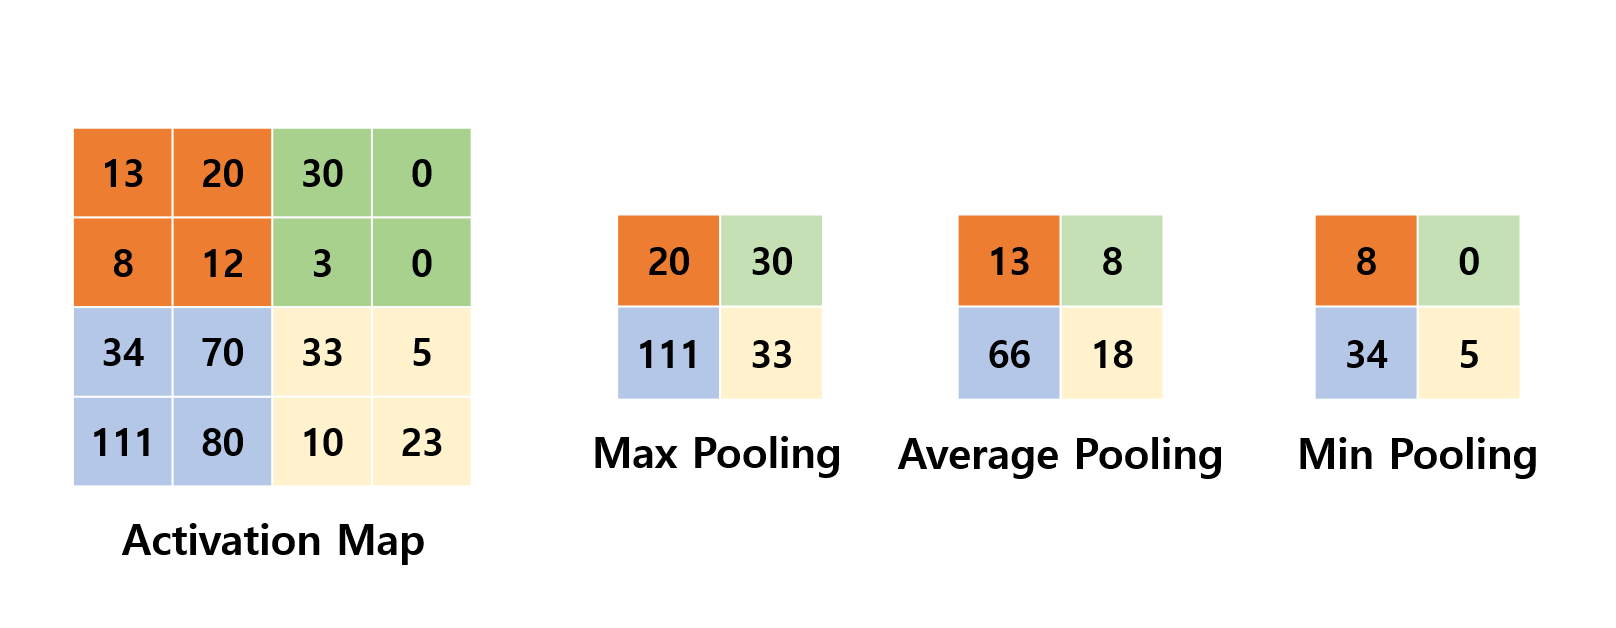

4. Flatten

 - 2차원/3차원의 행렬 구조를 1차원의 Vector로 변환하는 과정 

 - 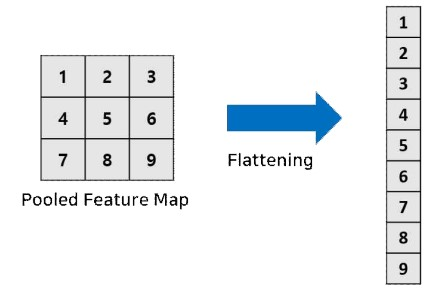

5. Fully-connected 계층

 - Flatten후에는 물체와 유사한 형태들의 Feature map들이 선별되어 Classification 하는 과정
  
 - 이전 계층의 모든 노드가 다음 계층의 모든 노드에 연결된 계층

 - 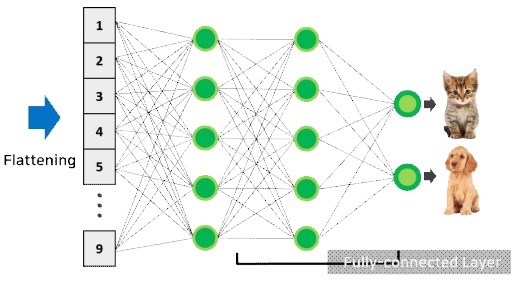

6. CNN의 전체적인 네트워크 구조

  - 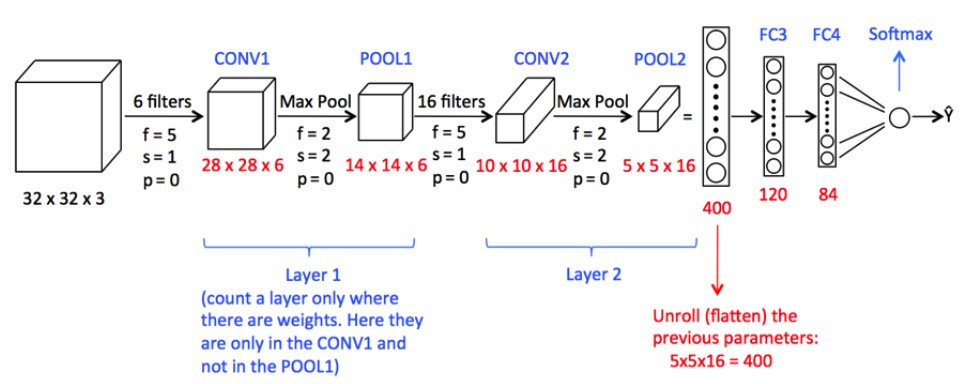

# Convolutional Neural Network

In [ ]:
# 기본 라이브러리
import numpy as np
import pandas as pd

# Pytorch 라이브러리
import torch
import torch.nn as nn # SGD, Adam 등과 같은 optimizer
import torch.optim as optim # 모든 neural network 모듈
import torch.nn.functional as F # Parameterless functions
from torch.utils.data import DataLoader # 미니배치를 생성하여 쉽게 데이터 셋 처리
import torchvision.datasets as datasets 
import torchvision.transforms as transforms # augumetation을 위해 데이터 세트에서 수행할 수 있는 변환
from tqdm import tqdm  # progress bar (진행상황 확인)

In [ ]:
# 파이썬 코드를 재실행해도 같은 결과가 나오도록 랜덤 시드(random seed) 설정
torch.manual_seed(1)

In [ ]:
### MNIST dataset 
# input_size: the size of the input, in this case 784 (28x28)
# num_classes: the number of classes we want to predict, in this case 10 (0-9)
# Simple CNN
class CNN(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(16 * 7 * 7, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        return x

In [ ]:
# class test
model = CNN()
x = torch.randn(64, 1, 28, 28) # Mnist x : [64, 1, 28, 28]
model(x).shape

torch.Size([64, 10])

In [ ]:
# Set device (Cuda / cpu)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
# Hyperparameters
in_channels = 1
num_classes = 10
learning_rate = 3e-4
batch_size = 64
num_epochs = 10

In [ ]:
# Load Data
train_dataset = datasets.MNIST (root = "dataset/", train=True, transform = transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST (root = "dataset/", train=False, transform = transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, shuffle=True, batch_size = batch_size)
test_loader = DataLoader(dataset=train_dataset, shuffle=True, batch_size = batch_size)

In [ ]:
# model creating
model = CNN().to(device)
model

CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train Network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # Forward
        scores = model(data)
        loss = criterion(scores, targets)

        # Backward
        optimizer.zero_grad()
        loss.backward()

        # Gradient descent or adam step
        optimizer.step()

100%|██████████| 938/938 [00:13<00:00, 70.21it/s]


In [ ]:
# Check accuracy on training & test 
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval() # eval mode에서 사용할 것이라고 모든 레이어에 선언하는 것

    # torch.no_grad() : 검증단계에서는 backprop을 하지 않을 것이기 때문에 
    # no_grad()로 감싸주고 이는 이 블럭 안에서는 그래디언트 트래킹을 안해도 된다 라고 선언 
    # ===> 메모리& 시간 감소
    with torch.no_grad():
        for x, y in tqdm(loader):

            # Move data to device
            x = x.to(device=device)
            y = y.to(device=device)

            # Forward pass
            scores = model(x)
            _, predictions = scores.max(1)

            # Check how many we got correct
            num_correct += (predictions == y).sum()

            # Keep track of number of samples
            num_samples += predictions.size(0)

    model.train() # eval => train 
    return num_correct / num_samples

In [ ]:
# Check accuracy on training & test to see how good our model
print(f"Accuracy on training set : {check_accuracy(train_loader, model)*100:.2f}")
print(f"\nAccuracy on test set : {check_accuracy(test_loader, model)*100:.2f}")

100%|██████████| 938/938 [00:09<00:00, 103.41it/s]


Accuracy on training set: 98.33


100%|██████████| 938/938 [00:09<00:00, 103.97it/s]


Accuracy on test set: 98.33
